In [1]:
%run center_of_mass_calculation.ipynb

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
B = 1
N = 50
I = 18
V = 52
mu = 2.08
S = 0.015

In [4]:
def delta(omega, t, i):
    value = omega*t + np.pi/2 + ((i - 1)*4*np.pi/6)
    return ((-np.pi*6 <= value) & (value <= 7*np.pi/6)).astype(int)

In [5]:
def torque(t, omega, r, m):
    return (-B*N*I*mu*S*(
        delta(omega, t, 1)*np.sin(omega*t + np.pi/2)
        + delta(omega, t, 2)*np.sin(omega*t + 7*np.pi/6)
        + delta(omega, t, 3)*np.sin(omega*t + 11*np.pi/6)
    # ) - 10*r[0]*m*(np.cos(omega*t + np.pi/2) + np.cos(omega*t + 7*np.pi/6) + np.cos(omega*t + 11*np.pi/6)))
    ) - 10*m*(
        (r[0]*np.cos(omega*t + np.pi/2) + r[1]*np.sin(omega*t + np.pi/2))
        + (r[0]*np.cos(omega*t + 7*np.pi/6) + r[1]*np.sin(omega*t + 7*np.pi/6))
        + (r[0]*np.cos(omega*t + 11*np.pi/6) + r[1]*np.sin(omega*t + 11*np.pi/6))
    ))

In [6]:
def domega_dt(t, omega, r, m):
    return torque(t, omega, r, m)/(3*m*(tf.reduce_sum(tf.square(r))))

In [7]:
def evaluate_efficiency(parameters, t, show_plots=False):
    r, m = calculate_center_of_mass(parameters)
    omega = solve_ivp(domega_dt, [0, 120], np.array([0]), args=tuple([r, m]), t_eval=t).y[0]
    
    if show_plots:
        plt.figure(figsize=(7, 7))
        plt.title("Залежність моменту обертання двигуна від часу")
        plt.xlabel("Час (секунди)")
        plt.ylabel("Момент обертання (Н * м)")
        plt.grid()
        plt.plot(t, -torque(t, omega, r, m))

        plt.figure(figsize=(7, 7))
        plt.title("Залежність швидкості обертання від часу")
        plt.xlabel("Час (секунди)")
        plt.ylabel("Швидкість обертання (об./хв)")
        plt.grid()
        plt.plot(t, -(omega/2*np.pi)*60)
    
    power = omega*torque(t, omega, r, m)
    efficiency = power / (I * V)
    
    return tf.reduce_max(efficiency)

In [8]:
t = np.linspace(0, 120, 1000)

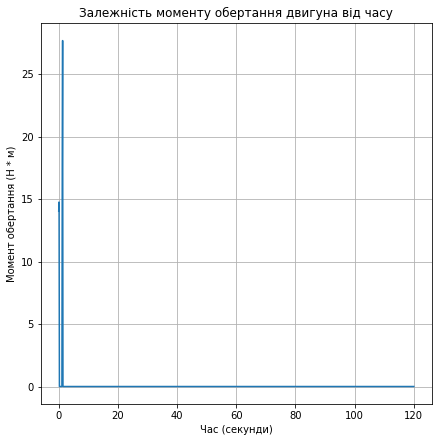

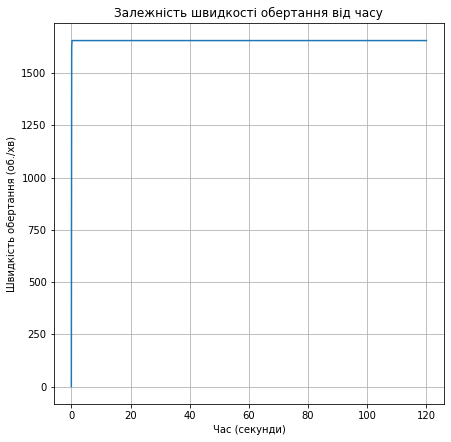

In [9]:
# efficiency = evaluate_efficiency(canonical_parameters, t, show_plots=True)

In [10]:
# efficiency

<tf.Tensor: shape=(), dtype=float32, numpy=0.51934665>